<h1 align="center">Analítica de datos para la toma de decisiones empresariales</h1>
<h1 align="center">Outliers: Identificación de datos raros</h1>
<h1 align="center">Centro de Educación Continua</h1>
<h1 align="center">EAFIT</h1>
<h1 align="center">2023</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

*** 
|![Gmail](https://img.shields.io/badge/Gmail-D14836?style=plastic&logo=gmail&logoColor=white)|<carlosalvarezh@gmail.com>|![Outlook](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=plastic&logo=microsoft-outlook&logoColor=white)|<calvar52@eafit.edu.co>|
|-:|:-|--:|:--|
|[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/carlosalvarez5/)|[![@alvarezhenao](https://img.shields.io/twitter/url/https/twitter.com/alvarezhenao.svg?style=social&label=Follow%20%40alvarezhenao)](https://twitter.com/alvarezhenao)|[![@carlosalvarezh](https://img.shields.io/badge/github-%23121011.svg?style=plastic&logo=github&logoColor=white)](https://github.com/carlosalvarezh)|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosalvarezh/Curso_CEC_EAFIT/blob/main/Ejemplos_C02_6_Outliers.ipynb)|

<table>
 <tr align=left><td><img align=left src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/CCLogoColorPop1.gif?raw=true" width="25">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

***

# Introducción

La detección de valores atípicos, también conocida como detección de anomalías, es una tarea esencial en la ciencia de datos y se enfoca en identificar puntos de datos con valores extremos en comparación con la distribución general. Esta técnica encuentra diversas aplicaciones en la toma de decisiones empresariales, abarcando desde la detección de fraudes y ciberataques hasta la identificación de falsificaciones de billetes en el sector financiero y médico. En cada uno de estos escenarios, los valores atípicos señalan eventos raros o inusuales que pueden impactar significativamente en la estrategia de la empresa.

Python ofrece una variedad de métodos y paquetes para la detección de valores atípicos. Al seleccionar un método, es crucial considerar la modalidad de los datos, es decir, el número de picos en su distribución. Además, la dimensionalidad y el tamaño del conjunto de datos también juegan un papel importante en la elección del método adecuado. Desde métodos estadísticos simples hasta enfoques más avanzados como *isolation forest* y *OneClassSVM*, la selección del método depende de la naturaleza y el volumen de los datos.

En el siguiente ejemplo, se exploran distintos métodos para identificar valores atípicos en el conjunto de datos de detección de billetes falsos de un banco suizo. Este caso demuestra cómo la detección de valores atípicos puede ofrecer información valiosa para abordar desafíos específicos en el contexto de la analítica de datos y la toma de decisiones empresariales.

# Enunciado del problema

Los datos del banco suizo consisten en $200$ mediciones de billetes suizos. Las primeras $100$ de estas mediciones son de billetes genuinos, y las otras $100$ son de billetes falsificados. En estos datos, deseamos construir un modelo para clasificar los billetes genuinos y falsificados. En esta nota, hemos creado dos clasificadores para reconocer los billetes.

Primero, presentamos las siguientes variables:  

<p float="center">
  <img src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/Banknotes.jpg?raw=true" width="300" />
</p>


$Y$ = Billete falso ($Y = 1$) o genuino ($Y=0$) (`Counterfeit`)  
$X_1$ = Longitud del billete (`Length`)  
$X_2$ = Altura del billete - izquierda (`Left`)  
$X_3$ = Altura del billete - derecha (`Right `)  
$X_4$ = Distancia del marco interior al borde inferior (`Bottom`)  
$X_5$ = Distancia del marco interior al borde superior (`Top`)  
$X_6$ = Longitud de la diagonal de la imagen central (`Diagonal`)

En la clasificación binaria, "$1$" suele indicar la clase positiva (falso en este caso), mientras que "$0$" indica la clase negativa (genuino en este caso). Utilizarías estas etiquetas para entrenar y evaluar el modelo de clasificación, con el objetivo de clasificar correctamente los billetes como falsos o genuinos en función de las características proporcionadas ($X_1$ a $X_6)$.

# Carga de datos y análisis exploratorio

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [2]:
df = pd.read_csv("Data/banknotes.csv")

In [3]:
df.head(10)

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
5,0,215.7,130.8,130.5,9.0,10.1,141.4
6,0,215.5,129.5,129.7,7.9,9.6,141.6
7,0,214.5,129.6,129.2,7.2,10.7,141.7
8,0,214.9,129.4,129.7,8.2,11.0,141.9
9,0,215.2,130.4,130.3,9.2,10.0,140.7


Lo primero que observamos es que el nombre de la primera columna está mal escrito:

In [4]:
df = df.rename(columns={'conterfeit':'counterfeit'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   counterfeit  200 non-null    int64  
 1   Length       200 non-null    float64
 2   Left         200 non-null    float64
 3   Right        200 non-null    float64
 4   Bottom       200 non-null    float64
 5   Top          200 non-null    float64
 6   Diagonal     200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [6]:
df.describe()

,counterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


# Limpieza de datos

Comencemos esto manejando los valores faltantes

In [7]:
totalMissingVals = df.isnull().sum().sort_values(ascending=True)
totalMissingVals

counterfeit    0
Length         0
Left           0
Right          0
Bottom         0
Top            0
Diagonal       0
dtype: int64

No se observan datos faltantes. Ahora verifiquemos datos duplicados

In [8]:
df.index.is_unique

True

# Manejo de Outliers 

Text(0.5, 1.0, 'Boxplot of Swiss Banknote Length ')

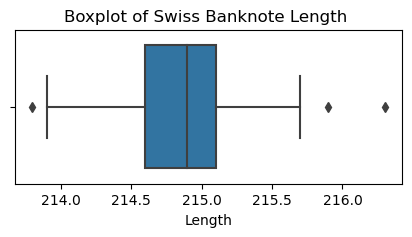

In [9]:
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x=df["Length"])
plt.title("Boxplot of Swiss Banknote Length ")

Los puntos en los diagramas de caja corresponden a valores atípicos extremos. Podemos validar que estos son valores atípicos filtrando nuestro DataFrame y usando el método `count` para contar el número de falsificaciones:

In [10]:
outliers = df[df['Length'] > 216]
outliers

,counterfeit,Length,Left,Right,Bottom,Top,Diagonal
166,1,216.3,130.7,130.4,10.0,10.1,138.8


Vemos que, con estas condiciones, sólo capturamos uno de cada 100 billetes falsos. Si relajamos las condiciones de filtrado para capturar valores atípicos adicionales, veremos que también capturamos billetes auténticos:

In [11]:
outliers2 = df[df['Length'] > 215.5]
outliers2

,counterfeit,Length,Left,Right,Bottom,Top,Diagonal
5,0,215.7,130.8,130.5,9.0,10.1,141.4
21,0,215.6,130.5,130.0,8.1,10.3,141.6
23,0,215.7,130.2,130.0,8.7,10.0,141.6
33,0,215.6,130.4,130.1,8.4,10.3,141.0
34,0,215.9,130.4,130.0,8.9,10.6,141.4
56,0,215.7,130.0,129.4,9.2,10.4,141.2
95,0,215.6,129.9,129.9,9.0,9.5,141.7
160,1,215.6,130.1,129.7,7.4,12.2,138.4
166,1,216.3,130.7,130.4,10.0,10.1,138.8
167,1,215.6,130.4,130.1,9.6,11.2,138.6


Esto corresponde a una precisión de $0,30$, lo que no es un gran rendimiento. Peor aún, esto corresponde a una precisión del $1,5$ por ciento.

Para ayudar a abordar esta inexactitud, podemos buscar columnas adicionales en los diagramas de caja. Creemos diagramas de caja para las columnas restantes y una función que nos permita generar diagramas de caja para cualquier columna numérica:

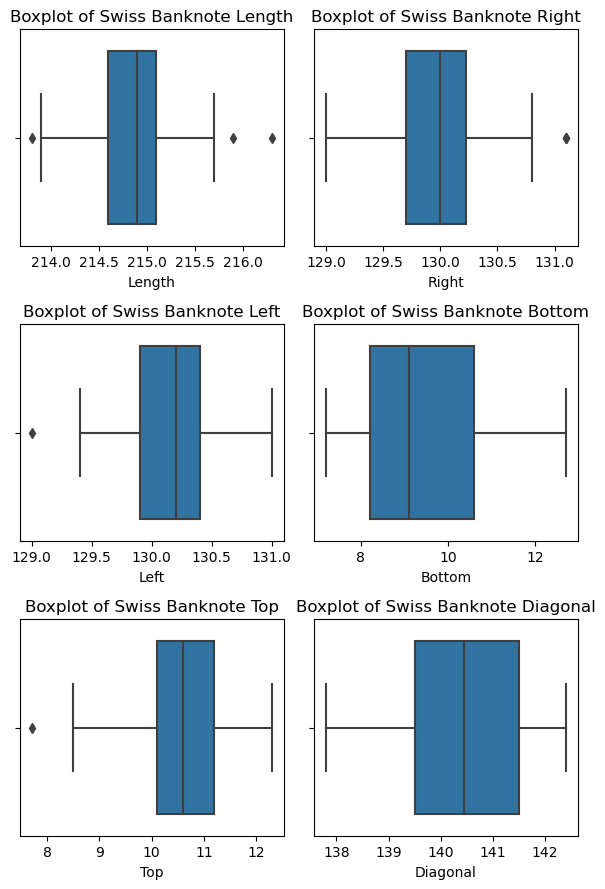

In [12]:
def boxplot(column):
    plt.subplot(3, 2, i+1)  # Define la posición del gráfico en la matriz 3x2
    sns.boxplot(data=df, x=df[f"{column}"])
    plt.title(f"Boxplot of Swiss Banknote {column}")

plt.figure(figsize=(6, 9))  # Tamaño total de la figura
columns = ['Length', 'Right', 'Left', 'Bottom', 'Top', 'Diagonal']

for i, column in enumerate(columns):
    boxplot(column)

plt.tight_layout()  # Ajusta la disposición de los gráficos
plt.show()

Y llamemos a la función con las columnas de longitud, izquierda, derecha, abajo, arriba y diagonal:

Podemos filtrar por el 50 por ciento superior por longitud, derecha, izquierda e inferior:

In [13]:
df_outlier3 = df[(df['Length']> 215)&(df['Right']> 130)&(df['Left']>130)&(df['Bottom']> 10)].copy()
print(Counter(df_outlier3['counterfeit']))

Counter({1: 8})


Vemos que ahora capturamos ocho falsificaciones. Aunque esto es una mejora con respecto al único billete falso que capturamos antes, todavía omitimos $92$ falsificaciones adicionales, lo que corresponde a una precisión del $4\%$ por ciento. Además, cuantas más columnas numéricas tengamos en nuestros datos, más engorrosa se vuelve la tarea de detección de valores atípicos. Por esta razón, los diagramas de caja son ideales para conjuntos de datos pequeños y simples con pocas columnas.

# Detección automática de valores atípicos

[Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest) es un método de detección de valores atípicos que funciona seleccionando columnas aleatoriamente y sus valores para separar diferentes partes de los datos. Funciona bien con datos más complejos, como conjuntos con muchas más columnas y valores numéricos multimodales.

Importemos el paquete [`IsolationForest`](https://scikit-learn.org/0.21/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) y ajustémoslo a las columnas de longitud, izquierda, derecha, inferior, superior y diagonal. Tenga en cuenta que este algoritmo solo recibe entradas porque es una técnica de aprendizaje automático no supervisada, a diferencia de las técnicas de aprendizaje automático supervisadas, que se entrenan tanto en funciones como en objetivos. Afortunadamente, aún podemos validar nuestras predicciones porque nuestros datos vienen con etiquetas falsificadas.

Primero, importemos los paquetes necesarios:

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


A continuación, definamos nuestra entrada y salida (solo usaremos esto para validación, no para entrenamiento) y dividamos nuestros datos:

In [34]:
X = df[['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']]
y = df['counterfeit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

A continuación, ajustemos nuestro modelo a nuestras entradas:

In [35]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)

Finalmente, predigamos los datos de la prueba y evaluemos la puntuación de precisión. Para nuestros propósitos aquí, validaremos para tener una idea de qué tan bien los métodos pueden detectar valores atípicos:

In [36]:
pred = pd.DataFrame({'pred': y_pred})
pred['y_pred'] = np.where(pred['pred'] == -1, 1, 0)
y_pred = pred['y_pred'] 
print("Precision:", precision_score(y_test, y_pred))

Precision: 1.0


Vemos que nuestro modelo de detección de valores atípicos tiene una precisión de $62,5\%$. Compare esto con la precisión de $30\%$ que logramos con los diagramas de caja. Este modelo también ofrece una precisión del $56\%$, en comparación con el cuatro por ciento de los diagramas de caja, lo que muestra una mejora significativa en la detección de valores atípicos. Esto se debe a que los *Isolation Forest* pueden dividir los datos e identificar valores atípicos en múltiples características.

Cuando utilizamos diagramas de caja, tenemos que inspeccionar manualmente los valores atípicos e intentar sacar conclusiones utilizando múltiples características, lo que se vuelve cada vez más difícil cuanto mayor es el número de características. Por ejemplo, puede tener un grupo de puntos donde los valores de características individuales pueden no ser valores atípicos, pero una combinación de valores puede ser anómala. Este tipo de comportamiento es difícil de detectar mediante la inspección de diagramas de caja.